# Python Workshop

## Part 1 Analyze sentiment with dictionary

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
reviews = df[['text']]

In [5]:
reviews.head()

,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,General Manager Scott Petello is a good egg!!!...


In [6]:
# create dictionary list (prositive)

dict_p = []
f = open('positive-words.txt', 'r')   
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
        dict_p.append(t)
f.close()

In [7]:
# create dictionary list (negative)

dict_n = []
f = open('negative-words.txt', 'r')
# f = open('negative-words.txt', 'r', encoding='ISO-8859-1') 
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
         dict_n.append(t)
f.close()

##Please add ’encoding='ISO-8859-1‘ in f = open(), if you get a UnicodeDecodeError: 'utf-8' codec can't decode byte 0xef
##That's because some character in negative-words.txt cannot be decode by 'utf-8'
##See difference between some character encoding forms: GBK、GB2312、UTF-8、ISO-8859-1，if interested.

In [8]:
dict_p

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [9]:
dict_n

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [10]:
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 

poscnt = []
negcnt = []
netcnt = []

for nrow in range(0,len(reviews)):
    
    text = df.text[nrow].lower()
    qa = 0
    qb = 0

    for word in dict_p :
        if (word in text) :
            qa = qa + 1

    for word in dict_n :
        if (word in text) :
            qb = qb + 1

    qc = qa - qb
    
    poscnt.append(qa)
    negcnt.append(qb)
    netcnt.append(qc)

In [11]:
df['poscnt'] = poscnt
df['negcnt'] = negcnt
df['netcnt'] = netcnt
df[['text','poscnt','negcnt','netcnt']]

,text,poscnt,negcnt,netcnt
0,My wife took me here on my birthday for breakf...,17,16,1
1,I have no idea why some people give bad review...,13,11,2
2,love the gyro plate. Rice is so good and I als...,2,0,2
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",8,3,5
4,General Manager Scott Petello is a good egg!!!...,10,10,0
5,"Quiessence is, simply put, beautiful. Full wi...",29,24,5
6,Drop what you're doing and drive here. After I...,24,20,4
7,"Luckily, I didn't have to travel far to make m...",5,3,2
8,Definitely come for Happy hour! Prices are ama...,6,2,4
9,Nobuo shows his unique talents with everything...,3,1,2


In [12]:
result = []
pos=0
neg=0
net=0
for num in netcnt:
    if (num > 0):
        result.append('pos')
        pos+=1
    elif (num < 0):
        result.append('neg')
        neg+=1
    else:
        result.append('net')
        net+=1
        
result

['pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'net',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'net',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'net',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [13]:
df['result'] = result

In [14]:
df[['text','poscnt','negcnt','netcnt','result']]

,text,poscnt,negcnt,netcnt,result
0,My wife took me here on my birthday for breakf...,17,16,1,pos
1,I have no idea why some people give bad review...,13,11,2,pos
2,love the gyro plate. Rice is so good and I als...,2,0,2,pos
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",8,3,5,pos
4,General Manager Scott Petello is a good egg!!!...,10,10,0,net
5,"Quiessence is, simply put, beautiful. Full wi...",29,24,5,pos
6,Drop what you're doing and drive here. After I...,24,20,4,pos
7,"Luckily, I didn't have to travel far to make m...",5,3,2,pos
8,Definitely come for Happy hour! Prices are ama...,6,2,4,pos
9,Nobuo shows his unique talents with everything...,3,1,2,pos


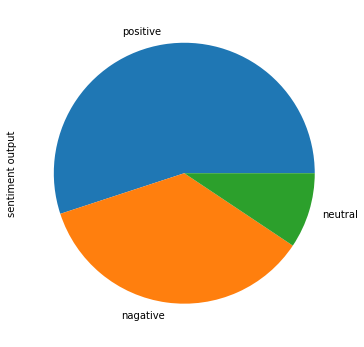

In [28]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6))

In [16]:
import matplotlib.pyplot as plt

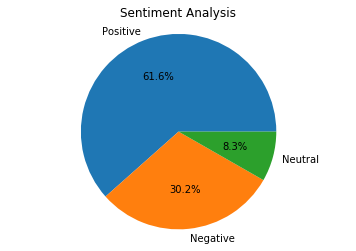

In [17]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = list(df.result.value_counts())
fig = plt.figure()  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')

plt.show()

## Part 2 Analyze sentiment with NLTK

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 

sentiment=[]
sid = SentimentIntensityAnalyzer()
for sentence in df['text']:
    ss = sid.polarity_scores(sentence)
    sentiment.append(ss)
    for k in ss:
         print('{0}: {1},  '.format(k, ss[k]), end='')
    print()

neg: 0.015,  neu: 0.687,  pos: 0.298,  compound: 0.995,  
neg: 0.049,  neu: 0.741,  pos: 0.21,  compound: 0.9943,  
neg: 0.0,  neu: 0.523,  pos: 0.477,  compound: 0.8988,  
neg: 0.0,  neu: 0.793,  pos: 0.207,  compound: 0.9531,  
neg: 0.029,  neu: 0.636,  pos: 0.334,  compound: 0.9883,  
neg: 0.045,  neu: 0.807,  pos: 0.148,  compound: 0.9873,  
neg: 0.053,  neu: 0.737,  pos: 0.21,  compound: 0.996,  
neg: 0.0,  neu: 0.685,  pos: 0.315,  compound: 0.9544,  
neg: 0.0,  neu: 0.768,  pos: 0.232,  compound: 0.9483,  
neg: 0.059,  neu: 0.775,  pos: 0.166,  compound: 0.4588,  
neg: 0.031,  neu: 0.781,  pos: 0.188,  compound: 0.875,  
neg: 0.025,  neu: 0.807,  pos: 0.168,  compound: 0.8047,  
neg: 0.015,  neu: 0.742,  pos: 0.244,  compound: 0.9764,  
neg: 0.019,  neu: 0.812,  pos: 0.169,  compound: 0.9468,  
neg: 0.014,  neu: 0.757,  pos: 0.23,  compound: 0.9944,  
neg: 0.137,  neu: 0.747,  pos: 0.115,  compound: -0.4961,  
neg: 0.114,  neu: 0.789,  pos: 0.097,  compound: -0.5098,  
neg: 0.04

neg: 0.0,  neu: 0.706,  pos: 0.294,  compound: 0.9595,  
neg: 0.077,  neu: 0.843,  pos: 0.081,  compound: -0.1131,  
neg: 0.064,  neu: 0.761,  pos: 0.175,  compound: 0.986,  
neg: 0.0,  neu: 0.885,  pos: 0.115,  compound: 0.5023,  
neg: 0.068,  neu: 0.839,  pos: 0.093,  compound: 0.8854,  
neg: 0.087,  neu: 0.731,  pos: 0.182,  compound: 0.9317,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.572,  pos: 0.428,  compound: 0.9735,  
neg: 0.056,  neu: 0.791,  pos: 0.153,  compound: 0.8783,  
neg: 0.032,  neu: 0.58,  pos: 0.387,  compound: 0.9843,  
neg: 0.022,  neu: 0.781,  pos: 0.197,  compound: 0.9897,  
neg: 0.063,  neu: 0.875,  pos: 0.063,  compound: -0.0,  
neg: 0.0,  neu: 0.79,  pos: 0.21,  compound: 0.7034,  
neg: 0.0,  neu: 0.926,  pos: 0.074,  compound: 0.1901,  
neg: 0.0,  neu: 0.751,  pos: 0.249,  compound: 0.9774,  
neg: 0.024,  neu: 0.829,  pos: 0.147,  compound: 0.9845,  
neg: 0.0,  neu: 0.411,  pos: 0.589,  compound: 0.8225,  
neg: 0.0,  neu: 0.617,  p

neg: 0.039,  neu: 0.821,  pos: 0.14,  compound: 0.987,  
neg: 0.0,  neu: 0.484,  pos: 0.516,  compound: 0.8617,  
neg: 0.146,  neu: 0.783,  pos: 0.071,  compound: -0.5106,  
neg: 0.02,  neu: 0.884,  pos: 0.096,  compound: 0.8739,  
neg: 0.11,  neu: 0.679,  pos: 0.212,  compound: 0.8877,  
neg: 0.054,  neu: 0.864,  pos: 0.082,  compound: 0.6711,  
neg: 0.0,  neu: 0.813,  pos: 0.187,  compound: 0.9503,  
neg: 0.0,  neu: 0.695,  pos: 0.305,  compound: 0.9844,  
neg: 0.075,  neu: 0.827,  pos: 0.098,  compound: 0.2846,  
neg: 0.0,  neu: 0.95,  pos: 0.05,  compound: 0.4404,  
neg: 0.042,  neu: 0.943,  pos: 0.014,  compound: -0.5064,  
neg: 0.0,  neu: 0.568,  pos: 0.432,  compound: 0.9081,  
neg: 0.024,  neu: 0.759,  pos: 0.217,  compound: 0.9849,  
neg: 0.121,  neu: 0.818,  pos: 0.06,  compound: -0.9305,  
neg: 0.121,  neu: 0.737,  pos: 0.142,  compound: 0.5805,  
neg: 0.0,  neu: 0.735,  pos: 0.265,  compound: 0.9886,  
neg: 0.0,  neu: 0.743,  pos: 0.257,  compound: 0.9581,  
neg: 0.079,  ne

neg: 0.031,  neu: 0.641,  pos: 0.328,  compound: 0.9769,  
neg: 0.0,  neu: 0.935,  pos: 0.065,  compound: 0.7902,  
neg: 0.0,  neu: 0.686,  pos: 0.314,  compound: 0.9735,  
neg: 0.022,  neu: 0.771,  pos: 0.207,  compound: 0.9875,  
neg: 0.022,  neu: 0.742,  pos: 0.236,  compound: 0.975,  
neg: 0.0,  neu: 0.801,  pos: 0.199,  compound: 0.9823,  
neg: 0.103,  neu: 0.825,  pos: 0.072,  compound: -0.4102,  
neg: 0.096,  neu: 0.789,  pos: 0.115,  compound: -0.6132,  
neg: 0.082,  neu: 0.67,  pos: 0.249,  compound: 0.7901,  
neg: 0.032,  neu: 0.928,  pos: 0.039,  compound: 0.2439,  
neg: 0.165,  neu: 0.725,  pos: 0.11,  compound: -0.631,  
neg: 0.0,  neu: 0.718,  pos: 0.282,  compound: 0.9857,  
neg: 0.152,  neu: 0.606,  pos: 0.242,  compound: 0.7745,  
neg: 0.018,  neu: 0.68,  pos: 0.303,  compound: 0.9846,  
neg: 0.0,  neu: 0.812,  pos: 0.188,  compound: 0.8172,  
neg: 0.037,  neu: 0.727,  pos: 0.236,  compound: 0.9884,  
neg: 0.018,  neu: 0.808,  pos: 0.174,  compound: 0.8787,  
neg: 0.03

neg: 0.174,  neu: 0.78,  pos: 0.045,  compound: -0.8151,  
neg: 0.05,  neu: 0.798,  pos: 0.152,  compound: 0.8301,  
neg: 0.021,  neu: 0.677,  pos: 0.302,  compound: 0.9668,  
neg: 0.03,  neu: 0.778,  pos: 0.192,  compound: 0.9971,  
neg: 0.102,  neu: 0.652,  pos: 0.245,  compound: 0.7639,  
neg: 0.0,  neu: 0.566,  pos: 0.434,  compound: 0.8478,  
neg: 0.117,  neu: 0.67,  pos: 0.212,  compound: 0.8375,  
neg: 0.029,  neu: 0.704,  pos: 0.267,  compound: 0.9924,  
neg: 0.048,  neu: 0.861,  pos: 0.092,  compound: 0.6641,  
neg: 0.016,  neu: 0.82,  pos: 0.164,  compound: 0.974,  
neg: 0.065,  neu: 0.825,  pos: 0.109,  compound: 0.5408,  
neg: 0.078,  neu: 0.657,  pos: 0.264,  compound: 0.9656,  
neg: 0.115,  neu: 0.846,  pos: 0.039,  compound: -0.9161,  
neg: 0.032,  neu: 0.704,  pos: 0.264,  compound: 0.9993,  
neg: 0.0,  neu: 0.896,  pos: 0.104,  compound: 0.9289,  
neg: 0.038,  neu: 0.824,  pos: 0.138,  compound: 0.636,  
neg: 0.0,  neu: 0.873,  pos: 0.127,  compound: 0.8516,  
neg: 0.0

neg: 0.023,  neu: 0.671,  pos: 0.305,  compound: 0.9787,  
neg: 0.086,  neu: 0.596,  pos: 0.318,  compound: 0.9717,  
neg: 0.033,  neu: 0.766,  pos: 0.201,  compound: 0.9864,  
neg: 0.119,  neu: 0.527,  pos: 0.354,  compound: 0.7717,  
neg: 0.023,  neu: 0.648,  pos: 0.33,  compound: 0.989,  
neg: 0.025,  neu: 0.759,  pos: 0.216,  compound: 0.9887,  
neg: 0.0,  neu: 0.536,  pos: 0.464,  compound: 0.8316,  
neg: 0.08,  neu: 0.7,  pos: 0.219,  compound: 0.9142,  
neg: 0.047,  neu: 0.733,  pos: 0.219,  compound: 0.9817,  
neg: 0.135,  neu: 0.728,  pos: 0.137,  compound: 0.5661,  
neg: 0.061,  neu: 0.845,  pos: 0.094,  compound: 0.2263,  
neg: 0.133,  neu: 0.765,  pos: 0.102,  compound: -0.6101,  
neg: 0.0,  neu: 0.644,  pos: 0.356,  compound: 0.9682,  
neg: 0.059,  neu: 0.704,  pos: 0.237,  compound: 0.9944,  
neg: 0.079,  neu: 0.797,  pos: 0.124,  compound: 0.8446,  
neg: 0.0,  neu: 0.347,  pos: 0.653,  compound: 0.9057,  
neg: 0.012,  neu: 0.839,  pos: 0.149,  compound: 0.9675,  
neg: 0.

neg: 0.082,  neu: 0.771,  pos: 0.147,  compound: 0.5859,  
neg: 0.0,  neu: 0.728,  pos: 0.272,  compound: 0.7964,  
neg: 0.025,  neu: 0.805,  pos: 0.17,  compound: 0.9867,  
neg: 0.126,  neu: 0.874,  pos: 0.0,  compound: -0.9252,  
neg: 0.0,  neu: 0.742,  pos: 0.258,  compound: 0.9274,  
neg: 0.054,  neu: 0.813,  pos: 0.133,  compound: 0.7351,  
neg: 0.028,  neu: 0.915,  pos: 0.057,  compound: 0.7055,  
neg: 0.037,  neu: 0.864,  pos: 0.1,  compound: 0.939,  
neg: 0.022,  neu: 0.858,  pos: 0.12,  compound: 0.8685,  
neg: 0.035,  neu: 0.871,  pos: 0.095,  compound: 0.8169,  
neg: 0.072,  neu: 0.765,  pos: 0.163,  compound: 0.8857,  
neg: 0.054,  neu: 0.673,  pos: 0.273,  compound: 0.963,  
neg: 0.041,  neu: 0.87,  pos: 0.089,  compound: 0.5981,  
neg: 0.039,  neu: 0.728,  pos: 0.233,  compound: 0.9939,  
neg: 0.099,  neu: 0.746,  pos: 0.155,  compound: 0.7595,  
neg: 0.058,  neu: 0.804,  pos: 0.139,  compound: 0.9136,  
neg: 0.0,  neu: 0.636,  pos: 0.364,  compound: 0.9931,  
neg: 0.017,

neg: 0.063,  neu: 0.798,  pos: 0.139,  compound: 0.746,  
neg: 0.061,  neu: 0.784,  pos: 0.155,  compound: 0.7544,  
neg: 0.0,  neu: 0.712,  pos: 0.288,  compound: 0.9956,  
neg: 0.025,  neu: 0.753,  pos: 0.222,  compound: 0.9679,  
neg: 0.037,  neu: 0.749,  pos: 0.213,  compound: 0.9778,  
neg: 0.0,  neu: 0.848,  pos: 0.152,  compound: 0.6688,  
neg: 0.035,  neu: 0.73,  pos: 0.236,  compound: 0.9094,  
neg: 0.0,  neu: 0.633,  pos: 0.367,  compound: 0.4404,  
neg: 0.056,  neu: 0.732,  pos: 0.212,  compound: 0.9963,  
neg: 0.0,  neu: 0.643,  pos: 0.357,  compound: 0.99,  
neg: 0.107,  neu: 0.813,  pos: 0.08,  compound: -0.59,  
neg: 0.0,  neu: 0.763,  pos: 0.237,  compound: 0.9858,  
neg: 0.023,  neu: 0.742,  pos: 0.236,  compound: 0.9489,  
neg: 0.011,  neu: 0.747,  pos: 0.243,  compound: 0.9933,  
neg: 0.0,  neu: 0.697,  pos: 0.303,  compound: 0.9676,  
neg: 0.0,  neu: 0.715,  pos: 0.285,  compound: 0.9747,  
neg: 0.024,  neu: 0.799,  pos: 0.176,  compound: 0.8803,  
neg: 0.0,  neu: 0

neg: 0.0,  neu: 0.684,  pos: 0.316,  compound: 0.7184,  
neg: 0.068,  neu: 0.635,  pos: 0.297,  compound: 0.9371,  
neg: 0.0,  neu: 0.673,  pos: 0.327,  compound: 0.9552,  
neg: 0.074,  neu: 0.772,  pos: 0.154,  compound: 0.8516,  
neg: 0.009,  neu: 0.94,  pos: 0.05,  compound: 0.6933,  
neg: 0.054,  neu: 0.787,  pos: 0.159,  compound: 0.8795,  
neg: 0.0,  neu: 0.598,  pos: 0.402,  compound: 0.8126,  
neg: 0.0,  neu: 0.796,  pos: 0.204,  compound: 0.9837,  
neg: 0.0,  neu: 0.788,  pos: 0.212,  compound: 0.9864,  
neg: 0.0,  neu: 0.654,  pos: 0.346,  compound: 0.9903,  
neg: 0.035,  neu: 0.783,  pos: 0.182,  compound: 0.9637,  
neg: 0.04,  neu: 0.834,  pos: 0.127,  compound: 0.9979,  
neg: 0.042,  neu: 0.874,  pos: 0.085,  compound: 0.8815,  
neg: 0.035,  neu: 0.908,  pos: 0.057,  compound: 0.4854,  
neg: 0.0,  neu: 0.52,  pos: 0.48,  compound: 0.8122,  
neg: 0.035,  neu: 0.752,  pos: 0.213,  compound: 0.9953,  
neg: 0.115,  neu: 0.818,  pos: 0.066,  compound: -0.7906,  
neg: 0.0,  neu:

neg: 0.032,  neu: 0.755,  pos: 0.213,  compound: 0.988,  
neg: 0.039,  neu: 0.805,  pos: 0.156,  compound: 0.973,  
neg: 0.014,  neu: 0.804,  pos: 0.182,  compound: 0.9955,  
neg: 0.049,  neu: 0.677,  pos: 0.274,  compound: 0.9947,  
neg: 0.057,  neu: 0.629,  pos: 0.314,  compound: 0.928,  
neg: 0.0,  neu: 0.536,  pos: 0.464,  compound: 0.9673,  
neg: 0.164,  neu: 0.81,  pos: 0.026,  compound: -0.7777,  
neg: 0.027,  neu: 0.77,  pos: 0.203,  compound: 0.9849,  
neg: 0.04,  neu: 0.617,  pos: 0.342,  compound: 0.9936,  
neg: 0.218,  neu: 0.782,  pos: 0.0,  compound: -0.5994,  
neg: 0.0,  neu: 0.688,  pos: 0.312,  compound: 0.9535,  
neg: 0.0,  neu: 0.529,  pos: 0.471,  compound: 0.9114,  
neg: 0.102,  neu: 0.759,  pos: 0.139,  compound: 0.9324,  
neg: 0.0,  neu: 0.705,  pos: 0.295,  compound: 0.985,  
neg: 0.033,  neu: 0.713,  pos: 0.254,  compound: 0.9853,  
neg: 0.096,  neu: 0.704,  pos: 0.2,  compound: 0.5267,  
neg: 0.0,  neu: 0.825,  pos: 0.175,  compound: 0.8126,  
neg: 0.0,  neu: 

neg: 0.0,  neu: 0.803,  pos: 0.197,  compound: 0.4019,  
neg: 0.088,  neu: 0.892,  pos: 0.02,  compound: -0.9007,  
neg: 0.02,  neu: 0.812,  pos: 0.168,  compound: 0.9768,  
neg: 0.017,  neu: 0.906,  pos: 0.077,  compound: 0.9408,  
neg: 0.0,  neu: 0.758,  pos: 0.242,  compound: 0.9951,  
neg: 0.087,  neu: 0.89,  pos: 0.023,  compound: -0.9082,  
neg: 0.0,  neu: 0.659,  pos: 0.341,  compound: 0.8856,  
neg: 0.0,  neu: 0.608,  pos: 0.392,  compound: 0.9764,  
neg: 0.021,  neu: 0.859,  pos: 0.12,  compound: 0.9982,  
neg: 0.03,  neu: 0.751,  pos: 0.22,  compound: 0.9907,  
neg: 0.0,  neu: 0.909,  pos: 0.091,  compound: 0.8805,  
neg: 0.0,  neu: 0.73,  pos: 0.27,  compound: 0.8876,  
neg: 0.0,  neu: 0.636,  pos: 0.364,  compound: 0.9764,  
neg: 0.0,  neu: 0.642,  pos: 0.358,  compound: 0.9758,  
neg: 0.065,  neu: 0.775,  pos: 0.16,  compound: 0.9528,  
neg: 0.035,  neu: 0.825,  pos: 0.139,  compound: 0.9223,  
neg: 0.0,  neu: 0.438,  pos: 0.562,  compound: 0.8271,  
neg: 0.023,  neu: 0.73

neg: 0.065,  neu: 0.861,  pos: 0.074,  compound: 0.4255,  
neg: 0.048,  neu: 0.84,  pos: 0.112,  compound: 0.9803,  
neg: 0.111,  neu: 0.64,  pos: 0.249,  compound: 0.6239,  
neg: 0.092,  neu: 0.799,  pos: 0.109,  compound: 0.3887,  
neg: 0.072,  neu: 0.928,  pos: 0.0,  compound: -0.3612,  
neg: 0.0,  neu: 0.661,  pos: 0.339,  compound: 0.6249,  
neg: 0.0,  neu: 0.846,  pos: 0.154,  compound: 0.9492,  
neg: 0.0,  neu: 0.511,  pos: 0.489,  compound: 0.9774,  
neg: 0.031,  neu: 0.892,  pos: 0.077,  compound: 0.7424,  
neg: 0.033,  neu: 0.73,  pos: 0.236,  compound: 0.9663,  
neg: 0.025,  neu: 0.924,  pos: 0.051,  compound: 0.4782,  
neg: 0.035,  neu: 0.594,  pos: 0.371,  compound: 0.9633,  
neg: 0.0,  neu: 0.794,  pos: 0.206,  compound: 0.9133,  
neg: 0.043,  neu: 0.896,  pos: 0.061,  compound: 0.1319,  
neg: 0.177,  neu: 0.768,  pos: 0.054,  compound: -0.9937,  
neg: 0.0,  neu: 0.679,  pos: 0.321,  compound: 0.9485,  
neg: 0.0,  neu: 0.862,  pos: 0.138,  compound: 0.7959,  
neg: 0.048, 

neg: 0.0,  neu: 0.361,  pos: 0.639,  compound: 0.9246,  
neg: 0.206,  neu: 0.686,  pos: 0.108,  compound: -0.4071,  
neg: 0.0,  neu: 0.87,  pos: 0.13,  compound: 0.8915,  
neg: 0.042,  neu: 0.82,  pos: 0.138,  compound: 0.9797,  
neg: 0.0,  neu: 0.745,  pos: 0.255,  compound: 0.9286,  
neg: 0.043,  neu: 0.803,  pos: 0.154,  compound: 0.8519,  
neg: 0.067,  neu: 0.838,  pos: 0.095,  compound: 0.6697,  
neg: 0.013,  neu: 0.781,  pos: 0.207,  compound: 0.9918,  
neg: 0.087,  neu: 0.79,  pos: 0.123,  compound: 0.8716,  
neg: 0.028,  neu: 0.872,  pos: 0.1,  compound: 0.9539,  
neg: 0.053,  neu: 0.776,  pos: 0.171,  compound: 0.8565,  
neg: 0.0,  neu: 0.647,  pos: 0.353,  compound: 0.9814,  
neg: 0.031,  neu: 0.876,  pos: 0.092,  compound: 0.7418,  
neg: 0.058,  neu: 0.697,  pos: 0.245,  compound: 0.9835,  
neg: 0.037,  neu: 0.79,  pos: 0.173,  compound: 0.9681,  
neg: 0.0,  neu: 0.469,  pos: 0.531,  compound: 0.8802,  
neg: 0.0,  neu: 0.783,  pos: 0.217,  compound: 0.8018,  
neg: 0.054,  ne

neg: 0.0,  neu: 0.775,  pos: 0.225,  compound: 0.9419,  
neg: 0.012,  neu: 0.826,  pos: 0.162,  compound: 0.9953,  
neg: 0.019,  neu: 0.799,  pos: 0.182,  compound: 0.9919,  
neg: 0.039,  neu: 0.802,  pos: 0.159,  compound: 0.955,  
neg: 0.0,  neu: 0.688,  pos: 0.312,  compound: 0.9508,  
neg: 0.021,  neu: 0.78,  pos: 0.199,  compound: 0.9961,  
neg: 0.031,  neu: 0.714,  pos: 0.255,  compound: 0.9986,  
neg: 0.0,  neu: 0.811,  pos: 0.189,  compound: 0.9852,  
neg: 0.051,  neu: 0.667,  pos: 0.282,  compound: 0.9678,  
neg: 0.025,  neu: 0.888,  pos: 0.087,  compound: 0.8533,  
neg: 0.144,  neu: 0.775,  pos: 0.081,  compound: -0.9512,  
neg: 0.052,  neu: 0.685,  pos: 0.263,  compound: 0.8866,  
neg: 0.034,  neu: 0.804,  pos: 0.162,  compound: 0.9636,  
neg: 0.0,  neu: 0.752,  pos: 0.248,  compound: 0.9778,  
neg: 0.0,  neu: 0.647,  pos: 0.353,  compound: 0.9831,  
neg: 0.063,  neu: 0.687,  pos: 0.25,  compound: 0.9413,  
neg: 0.01,  neu: 0.809,  pos: 0.181,  compound: 0.9666,  
neg: 0.036

neg: 0.039,  neu: 0.567,  pos: 0.395,  compound: 0.9915,  
neg: 0.133,  neu: 0.749,  pos: 0.118,  compound: -0.59,  
neg: 0.017,  neu: 0.775,  pos: 0.208,  compound: 0.9947,  
neg: 0.088,  neu: 0.747,  pos: 0.165,  compound: 0.9372,  
neg: 0.0,  neu: 0.883,  pos: 0.117,  compound: 0.8172,  
neg: 0.0,  neu: 0.876,  pos: 0.124,  compound: 0.9315,  
neg: 0.02,  neu: 0.876,  pos: 0.104,  compound: 0.9748,  
neg: 0.032,  neu: 0.875,  pos: 0.092,  compound: 0.9077,  
neg: 0.253,  neu: 0.676,  pos: 0.071,  compound: -0.9265,  
neg: 0.0,  neu: 0.719,  pos: 0.281,  compound: 0.9943,  
neg: 0.036,  neu: 0.679,  pos: 0.284,  compound: 0.9981,  
neg: 0.0,  neu: 0.748,  pos: 0.252,  compound: 0.9382,  
neg: 0.061,  neu: 0.761,  pos: 0.177,  compound: 0.937,  
neg: 0.028,  neu: 0.816,  pos: 0.156,  compound: 0.9899,  
neg: 0.0,  neu: 0.914,  pos: 0.086,  compound: 0.6808,  
neg: 0.0,  neu: 0.543,  pos: 0.457,  compound: 0.9147,  
neg: 0.046,  neu: 0.773,  pos: 0.181,  compound: 0.9881,  
neg: 0.019,

neg: 0.0,  neu: 0.669,  pos: 0.331,  compound: 0.9804,  
neg: 0.245,  neu: 0.681,  pos: 0.074,  compound: -0.742,  
neg: 0.036,  neu: 0.865,  pos: 0.1,  compound: 0.705,  
neg: 0.047,  neu: 0.806,  pos: 0.147,  compound: 0.9677,  
neg: 0.0,  neu: 0.526,  pos: 0.474,  compound: 0.9732,  
neg: 0.059,  neu: 0.85,  pos: 0.091,  compound: 0.8522,  
neg: 0.041,  neu: 0.581,  pos: 0.378,  compound: 0.9545,  
neg: 0.02,  neu: 0.91,  pos: 0.07,  compound: 0.9112,  
neg: 0.0,  neu: 0.779,  pos: 0.221,  compound: 0.9545,  
neg: 0.0,  neu: 0.801,  pos: 0.199,  compound: 0.9318,  
neg: 0.062,  neu: 0.75,  pos: 0.189,  compound: 0.9919,  
neg: 0.0,  neu: 0.694,  pos: 0.306,  compound: 0.9501,  
neg: 0.0,  neu: 0.744,  pos: 0.256,  compound: 0.9752,  
neg: 0.061,  neu: 0.837,  pos: 0.101,  compound: 0.6083,  
neg: 0.026,  neu: 0.835,  pos: 0.139,  compound: 0.9896,  
neg: 0.0,  neu: 0.671,  pos: 0.329,  compound: 0.9796,  
neg: 0.085,  neu: 0.759,  pos: 0.156,  compound: 0.9622,  
neg: 0.079,  neu: 0

neg: 0.025,  neu: 0.705,  pos: 0.271,  compound: 0.9946,  
neg: 0.074,  neu: 0.837,  pos: 0.09,  compound: 0.197,  
neg: 0.037,  neu: 0.797,  pos: 0.166,  compound: 0.9428,  
neg: 0.031,  neu: 0.834,  pos: 0.135,  compound: 0.8699,  
neg: 0.011,  neu: 0.857,  pos: 0.132,  compound: 0.984,  
neg: 0.166,  neu: 0.816,  pos: 0.018,  compound: -0.9624,  
neg: 0.037,  neu: 0.805,  pos: 0.158,  compound: 0.9149,  
neg: 0.021,  neu: 0.79,  pos: 0.189,  compound: 0.9466,  
neg: 0.012,  neu: 0.701,  pos: 0.288,  compound: 0.9984,  
neg: 0.0,  neu: 0.954,  pos: 0.046,  compound: 0.2263,  
neg: 0.028,  neu: 0.814,  pos: 0.158,  compound: 0.978,  
neg: 0.0,  neu: 0.943,  pos: 0.057,  compound: 0.6298,  
neg: 0.034,  neu: 0.808,  pos: 0.158,  compound: 0.9838,  
neg: 0.038,  neu: 0.811,  pos: 0.151,  compound: 0.9941,  
neg: 0.074,  neu: 0.837,  pos: 0.089,  compound: 0.3798,  
neg: 0.046,  neu: 0.698,  pos: 0.256,  compound: 0.9708,  
neg: 0.066,  neu: 0.733,  pos: 0.201,  compound: 0.9932,  
neg: 

neg: 0.029,  neu: 0.838,  pos: 0.133,  compound: 0.9956,  
neg: 0.049,  neu: 0.48,  pos: 0.471,  compound: 0.9963,  
neg: 0.04,  neu: 0.775,  pos: 0.185,  compound: 0.85,  
neg: 0.048,  neu: 0.794,  pos: 0.158,  compound: 0.9665,  
neg: 0.008,  neu: 0.743,  pos: 0.249,  compound: 0.9981,  
neg: 0.0,  neu: 0.905,  pos: 0.095,  compound: 0.4062,  
neg: 0.062,  neu: 0.837,  pos: 0.1,  compound: 0.7885,  
neg: 0.0,  neu: 0.884,  pos: 0.116,  compound: 0.6369,  
neg: 0.037,  neu: 0.837,  pos: 0.126,  compound: 0.9462,  
neg: 0.169,  neu: 0.757,  pos: 0.074,  compound: -0.9775,  
neg: 0.0,  neu: 0.606,  pos: 0.394,  compound: 0.9894,  
neg: 0.017,  neu: 0.815,  pos: 0.168,  compound: 0.9863,  
neg: 0.042,  neu: 0.715,  pos: 0.243,  compound: 0.7989,  
neg: 0.081,  neu: 0.581,  pos: 0.339,  compound: 0.9595,  
neg: 0.036,  neu: 0.719,  pos: 0.245,  compound: 0.9919,  
neg: 0.047,  neu: 0.714,  pos: 0.239,  compound: 0.8338,  
neg: 0.021,  neu: 0.696,  pos: 0.283,  compound: 0.9636,  
neg: 0.0

neg: 0.075,  neu: 0.866,  pos: 0.059,  compound: -0.3067,  
neg: 0.046,  neu: 0.645,  pos: 0.309,  compound: 0.9813,  
neg: 0.0,  neu: 0.883,  pos: 0.117,  compound: 0.8639,  
neg: 0.0,  neu: 0.923,  pos: 0.077,  compound: 0.784,  
neg: 0.059,  neu: 0.844,  pos: 0.097,  compound: 0.7369,  
neg: 0.065,  neu: 0.742,  pos: 0.193,  compound: 0.9608,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.754,  pos: 0.246,  compound: 0.8858,  
neg: 0.0,  neu: 0.659,  pos: 0.341,  compound: 0.9522,  
neg: 0.0,  neu: 0.463,  pos: 0.537,  compound: 0.9759,  
neg: 0.078,  neu: 0.819,  pos: 0.103,  compound: 0.7769,  
neg: 0.023,  neu: 0.755,  pos: 0.222,  compound: 0.9458,  
neg: 0.022,  neu: 0.834,  pos: 0.144,  compound: 0.9747,  
neg: 0.058,  neu: 0.605,  pos: 0.337,  compound: 0.9712,  
neg: 0.0,  neu: 0.766,  pos: 0.234,  compound: 0.992,  
neg: 0.047,  neu: 0.771,  pos: 0.181,  compound: 0.9809,  
neg: 0.008,  neu: 0.863,  pos: 0.129,  compound: 0.952,  
neg: 0.152,  neu: 0.

neg: 0.016,  neu: 0.777,  pos: 0.207,  compound: 0.9947,  
neg: 0.095,  neu: 0.869,  pos: 0.036,  compound: -0.8439,  
neg: 0.0,  neu: 0.774,  pos: 0.226,  compound: 0.9531,  
neg: 0.0,  neu: 0.86,  pos: 0.14,  compound: 0.8735,  
neg: 0.024,  neu: 0.909,  pos: 0.067,  compound: 0.5725,  
neg: 0.0,  neu: 0.527,  pos: 0.473,  compound: 0.9794,  
neg: 0.056,  neu: 0.781,  pos: 0.163,  compound: 0.9945,  
neg: 0.062,  neu: 0.638,  pos: 0.301,  compound: 0.9337,  
neg: 0.0,  neu: 0.707,  pos: 0.293,  compound: 0.9448,  
neg: 0.092,  neu: 0.844,  pos: 0.064,  compound: -0.3331,  
neg: 0.018,  neu: 0.722,  pos: 0.26,  compound: 0.9701,  
neg: 0.055,  neu: 0.832,  pos: 0.113,  compound: 0.9274,  
neg: 0.031,  neu: 0.812,  pos: 0.157,  compound: 0.8711,  
neg: 0.0,  neu: 0.696,  pos: 0.304,  compound: 0.9595,  
neg: 0.038,  neu: 0.654,  pos: 0.308,  compound: 0.982,  
neg: 0.028,  neu: 0.768,  pos: 0.204,  compound: 0.9956,  
neg: 0.024,  neu: 0.812,  pos: 0.163,  compound: 0.9944,  
neg: 0.02

neg: 0.0,  neu: 0.612,  pos: 0.388,  compound: 0.9859,  
neg: 0.016,  neu: 0.629,  pos: 0.355,  compound: 0.9978,  
neg: 0.028,  neu: 0.721,  pos: 0.251,  compound: 0.9957,  
neg: 0.0,  neu: 0.711,  pos: 0.289,  compound: 0.9216,  
neg: 0.0,  neu: 0.653,  pos: 0.347,  compound: 0.8173,  
neg: 0.079,  neu: 0.612,  pos: 0.31,  compound: 0.8134,  
neg: 0.124,  neu: 0.876,  pos: 0.0,  compound: -0.6091,  
neg: 0.026,  neu: 0.914,  pos: 0.06,  compound: 0.1265,  
neg: 0.081,  neu: 0.804,  pos: 0.115,  compound: 0.8123,  
neg: 0.048,  neu: 0.856,  pos: 0.095,  compound: 0.8614,  
neg: 0.237,  neu: 0.725,  pos: 0.038,  compound: -0.9636,  
neg: 0.073,  neu: 0.743,  pos: 0.184,  compound: 0.9591,  
neg: 0.0,  neu: 0.751,  pos: 0.249,  compound: 0.9825,  
neg: 0.0,  neu: 0.897,  pos: 0.103,  compound: 0.9687,  
neg: 0.03,  neu: 0.744,  pos: 0.226,  compound: 0.9912,  
neg: 0.0,  neu: 0.684,  pos: 0.316,  compound: 0.971,  
neg: 0.073,  neu: 0.836,  pos: 0.091,  compound: 0.3384,  
neg: 0.0,  ne

neg: 0.019,  neu: 0.767,  pos: 0.214,  compound: 0.9723,  
neg: 0.024,  neu: 0.702,  pos: 0.274,  compound: 0.9681,  
neg: 0.029,  neu: 0.751,  pos: 0.22,  compound: 0.9861,  
neg: 0.017,  neu: 0.645,  pos: 0.338,  compound: 0.9935,  
neg: 0.027,  neu: 0.762,  pos: 0.211,  compound: 0.9831,  
neg: 0.016,  neu: 0.724,  pos: 0.26,  compound: 0.9745,  
neg: 0.0,  neu: 0.877,  pos: 0.123,  compound: 0.8221,  
neg: 0.062,  neu: 0.749,  pos: 0.189,  compound: 0.8694,  
neg: 0.093,  neu: 0.822,  pos: 0.085,  compound: -0.183,  
neg: 0.0,  neu: 0.603,  pos: 0.397,  compound: 0.7128,  
neg: 0.096,  neu: 0.522,  pos: 0.382,  compound: 0.9901,  
neg: 0.013,  neu: 0.829,  pos: 0.158,  compound: 0.9823,  
neg: 0.082,  neu: 0.699,  pos: 0.219,  compound: 0.9798,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.102,  neu: 0.799,  pos: 0.099,  compound: -0.0742,  
neg: 0.054,  neu: 0.767,  pos: 0.18,  compound: 0.9643,  
neg: 0.0,  neu: 0.774,  pos: 0.226,  compound: 0.7845,  
neg: 0.077,  n

neg: 0.0,  neu: 0.0,  pos: 1.0,  compound: 0.5719,  
neg: 0.038,  neu: 0.836,  pos: 0.126,  compound: 0.8862,  
neg: 0.116,  neu: 0.668,  pos: 0.216,  compound: 0.9661,  
neg: 0.081,  neu: 0.833,  pos: 0.086,  compound: -0.2507,  
neg: 0.0,  neu: 0.575,  pos: 0.425,  compound: 0.9458,  
neg: 0.046,  neu: 0.796,  pos: 0.158,  compound: 0.9772,  
neg: 0.134,  neu: 0.739,  pos: 0.127,  compound: -0.5673,  
neg: 0.0,  neu: 0.919,  pos: 0.081,  compound: 0.7813,  
neg: 0.0,  neu: 0.752,  pos: 0.248,  compound: 0.8979,  
neg: 0.05,  neu: 0.669,  pos: 0.28,  compound: 0.9759,  
neg: 0.0,  neu: 0.636,  pos: 0.364,  compound: 0.9631,  
neg: 0.038,  neu: 0.787,  pos: 0.175,  compound: 0.9872,  
neg: 0.201,  neu: 0.674,  pos: 0.124,  compound: -0.6634,  
neg: 0.106,  neu: 0.738,  pos: 0.156,  compound: 0.9635,  
neg: 0.042,  neu: 0.876,  pos: 0.082,  compound: 0.2598,  
neg: 0.075,  neu: 0.597,  pos: 0.327,  compound: 0.9776,  
neg: 0.058,  neu: 0.768,  pos: 0.174,  compound: 0.7845,  
neg: 0.022

neg: 0.063,  neu: 0.896,  pos: 0.041,  compound: -0.6616,  
neg: 0.012,  neu: 0.669,  pos: 0.319,  compound: 0.9896,  
neg: 0.0,  neu: 0.756,  pos: 0.244,  compound: 0.9663,  
neg: 0.039,  neu: 0.732,  pos: 0.229,  compound: 0.9612,  
neg: 0.017,  neu: 0.509,  pos: 0.475,  compound: 0.9951,  
neg: 0.0,  neu: 0.643,  pos: 0.357,  compound: 0.9969,  
neg: 0.095,  neu: 0.715,  pos: 0.19,  compound: 0.7886,  
neg: 0.052,  neu: 0.744,  pos: 0.204,  compound: 0.9468,  
neg: 0.0,  neu: 0.931,  pos: 0.069,  compound: 0.4404,  
neg: 0.158,  neu: 0.555,  pos: 0.288,  compound: 0.8728,  
neg: 0.033,  neu: 0.783,  pos: 0.184,  compound: 0.9786,  
neg: 0.15,  neu: 0.813,  pos: 0.037,  compound: -0.9546,  
neg: 0.191,  neu: 0.753,  pos: 0.056,  compound: -0.9182,  
neg: 0.049,  neu: 0.792,  pos: 0.159,  compound: 0.9813,  
neg: 0.0,  neu: 0.827,  pos: 0.173,  compound: 0.8779,  
neg: 0.032,  neu: 0.758,  pos: 0.21,  compound: 0.9878,  
neg: 0.0,  neu: 0.847,  pos: 0.153,  compound: 0.958,  
neg: 0.0

neg: 0.11,  neu: 0.667,  pos: 0.223,  compound: 0.8356,  
neg: 0.031,  neu: 0.758,  pos: 0.211,  compound: 0.9931,  
neg: 0.035,  neu: 0.891,  pos: 0.074,  compound: 0.8635,  
neg: 0.028,  neu: 0.718,  pos: 0.253,  compound: 0.991,  
neg: 0.033,  neu: 0.832,  pos: 0.136,  compound: 0.6369,  
neg: 0.023,  neu: 0.866,  pos: 0.111,  compound: 0.7906,  
neg: 0.0,  neu: 0.858,  pos: 0.142,  compound: 0.933,  
neg: 0.216,  neu: 0.734,  pos: 0.049,  compound: -0.9196,  
neg: 0.193,  neu: 0.807,  pos: 0.0,  compound: -0.4767,  
neg: 0.0,  neu: 0.824,  pos: 0.176,  compound: 0.8519,  
neg: 0.035,  neu: 0.819,  pos: 0.146,  compound: 0.9451,  
neg: 0.095,  neu: 0.757,  pos: 0.148,  compound: 0.9071,  
neg: 0.163,  neu: 0.363,  pos: 0.474,  compound: 0.906,  
neg: 0.01,  neu: 0.833,  pos: 0.157,  compound: 0.9639,  
neg: 0.069,  neu: 0.716,  pos: 0.215,  compound: 0.9779,  
neg: 0.0,  neu: 0.256,  pos: 0.744,  compound: 0.4404,  
neg: 0.031,  neu: 0.653,  pos: 0.316,  compound: 0.9595,  
neg: 0.1

neg: 0.0,  neu: 0.615,  pos: 0.385,  compound: 0.9758,  
neg: 0.095,  neu: 0.816,  pos: 0.089,  compound: 0.101,  
neg: 0.0,  neu: 0.804,  pos: 0.196,  compound: 0.9766,  
neg: 0.0,  neu: 0.777,  pos: 0.223,  compound: 0.9877,  
neg: 0.0,  neu: 0.87,  pos: 0.13,  compound: 0.8807,  
neg: 0.0,  neu: 0.908,  pos: 0.092,  compound: 0.6319,  
neg: 0.094,  neu: 0.741,  pos: 0.165,  compound: 0.801,  
neg: 0.065,  neu: 0.749,  pos: 0.186,  compound: 0.8945,  
neg: 0.0,  neu: 0.69,  pos: 0.31,  compound: 0.9785,  
neg: 0.049,  neu: 0.75,  pos: 0.201,  compound: 0.9032,  
neg: 0.132,  neu: 0.692,  pos: 0.176,  compound: 0.1451,  
neg: 0.031,  neu: 0.811,  pos: 0.157,  compound: 0.9516,  
neg: 0.0,  neu: 0.794,  pos: 0.206,  compound: 0.9735,  
neg: 0.022,  neu: 0.878,  pos: 0.1,  compound: 0.8832,  
neg: 0.04,  neu: 0.612,  pos: 0.348,  compound: 0.9879,  
neg: 0.0,  neu: 0.723,  pos: 0.277,  compound: 0.9563,  
neg: 0.041,  neu: 0.774,  pos: 0.185,  compound: 0.9755,  
neg: 0.012,  neu: 0.842

neg: 0.028,  neu: 0.771,  pos: 0.202,  compound: 0.9946,  
neg: 0.029,  neu: 0.842,  pos: 0.129,  compound: 0.9503,  
neg: 0.0,  neu: 0.812,  pos: 0.188,  compound: 0.7391,  
neg: 0.041,  neu: 0.817,  pos: 0.142,  compound: 0.9336,  
neg: 0.048,  neu: 0.816,  pos: 0.137,  compound: 0.9676,  
neg: 0.037,  neu: 0.817,  pos: 0.146,  compound: 0.9279,  
neg: 0.043,  neu: 0.721,  pos: 0.235,  compound: 0.9772,  
neg: 0.023,  neu: 0.719,  pos: 0.258,  compound: 0.9875,  
neg: 0.0,  neu: 0.585,  pos: 0.415,  compound: 0.9311,  
neg: 0.0,  neu: 0.679,  pos: 0.321,  compound: 0.9942,  
neg: 0.029,  neu: 0.826,  pos: 0.145,  compound: 0.9157,  
neg: 0.013,  neu: 0.726,  pos: 0.261,  compound: 0.9916,  
neg: 0.053,  neu: 0.857,  pos: 0.09,  compound: 0.5202,  
neg: 0.032,  neu: 0.938,  pos: 0.03,  compound: -0.0408,  
neg: 0.0,  neu: 0.735,  pos: 0.265,  compound: 0.9934,  
neg: 0.077,  neu: 0.731,  pos: 0.192,  compound: 0.9415,  
neg: 0.038,  neu: 0.772,  pos: 0.19,  compound: 0.882,  
neg: 0.0

neg: 0.048,  neu: 0.901,  pos: 0.052,  compound: 0.6059,  
neg: 0.0,  neu: 0.759,  pos: 0.241,  compound: 0.9945,  
neg: 0.013,  neu: 0.844,  pos: 0.143,  compound: 0.9194,  
neg: 0.054,  neu: 0.881,  pos: 0.065,  compound: 0.899,  
neg: 0.269,  neu: 0.731,  pos: 0.0,  compound: -0.9244,  
neg: 0.0,  neu: 0.782,  pos: 0.218,  compound: 0.906,  
neg: 0.071,  neu: 0.749,  pos: 0.18,  compound: 0.8898,  
neg: 0.3,  neu: 0.7,  pos: 0.0,  compound: -0.7717,  
neg: 0.08,  neu: 0.765,  pos: 0.155,  compound: 0.9177,  
neg: 0.074,  neu: 0.821,  pos: 0.105,  compound: 0.1629,  
neg: 0.0,  neu: 0.936,  pos: 0.064,  compound: 0.5106,  
neg: 0.0,  neu: 0.648,  pos: 0.352,  compound: 0.9545,  
neg: 0.136,  neu: 0.699,  pos: 0.165,  compound: 0.2541,  
neg: 0.01,  neu: 0.816,  pos: 0.174,  compound: 0.9649,  
neg: 0.073,  neu: 0.811,  pos: 0.116,  compound: 0.5071,  
neg: 0.05,  neu: 0.817,  pos: 0.133,  compound: 0.8746,  
neg: 0.073,  neu: 0.84,  pos: 0.087,  compound: 0.5069,  
neg: 0.06,  neu: 0

neg: 0.0,  neu: 0.704,  pos: 0.296,  compound: 0.7906,  
neg: 0.0,  neu: 0.561,  pos: 0.439,  compound: 0.855,  
neg: 0.079,  neu: 0.797,  pos: 0.124,  compound: 0.7469,  
neg: 0.0,  neu: 0.488,  pos: 0.512,  compound: 0.8555,  
neg: 0.07,  neu: 0.781,  pos: 0.148,  compound: 0.9062,  
neg: 0.0,  neu: 0.914,  pos: 0.086,  compound: 0.4404,  
neg: 0.048,  neu: 0.744,  pos: 0.208,  compound: 0.9333,  
neg: 0.048,  neu: 0.854,  pos: 0.098,  compound: 0.3726,  
neg: 0.0,  neu: 0.554,  pos: 0.446,  compound: 0.8643,  
neg: 0.0,  neu: 0.738,  pos: 0.262,  compound: 0.9816,  
neg: 0.205,  neu: 0.721,  pos: 0.074,  compound: -0.8127,  
neg: 0.0,  neu: 0.836,  pos: 0.164,  compound: 0.6909,  
neg: 0.03,  neu: 0.677,  pos: 0.292,  compound: 0.9816,  
neg: 0.059,  neu: 0.853,  pos: 0.089,  compound: 0.4497,  
neg: 0.032,  neu: 0.922,  pos: 0.046,  compound: 0.7772,  
neg: 0.052,  neu: 0.789,  pos: 0.159,  compound: 0.9649,  
neg: 0.034,  neu: 0.716,  pos: 0.25,  compound: 0.9836,  
neg: 0.0,  neu

neg: 0.059,  neu: 0.814,  pos: 0.127,  compound: 0.8554,  
neg: 0.0,  neu: 0.703,  pos: 0.297,  compound: 0.9815,  
neg: 0.016,  neu: 0.762,  pos: 0.222,  compound: 0.9955,  
neg: 0.093,  neu: 0.684,  pos: 0.223,  compound: 0.887,  
neg: 0.032,  neu: 0.734,  pos: 0.234,  compound: 0.9976,  
neg: 0.063,  neu: 0.784,  pos: 0.153,  compound: 0.9733,  
neg: 0.059,  neu: 0.802,  pos: 0.139,  compound: 0.9843,  
neg: 0.036,  neu: 0.779,  pos: 0.185,  compound: 0.9119,  
neg: 0.0,  neu: 0.785,  pos: 0.215,  compound: 0.9753,  
neg: 0.1,  neu: 0.784,  pos: 0.116,  compound: 0.128,  
neg: 0.0,  neu: 0.74,  pos: 0.26,  compound: 0.988,  
neg: 0.045,  neu: 0.755,  pos: 0.2,  compound: 0.9079,  
neg: 0.0,  neu: 0.953,  pos: 0.047,  compound: 0.659,  
neg: 0.0,  neu: 0.813,  pos: 0.187,  compound: 0.9736,  
neg: 0.0,  neu: 0.668,  pos: 0.332,  compound: 0.8576,  
neg: 0.043,  neu: 0.847,  pos: 0.11,  compound: 0.9846,  
neg: 0.0,  neu: 0.713,  pos: 0.287,  compound: 0.9682,  
neg: 0.064,  neu: 0.93

neg: 0.054,  neu: 0.871,  pos: 0.075,  compound: 0.3505,  
neg: 0.098,  neu: 0.745,  pos: 0.158,  compound: 0.7184,  
neg: 0.026,  neu: 0.815,  pos: 0.159,  compound: 0.9731,  
neg: 0.0,  neu: 0.262,  pos: 0.738,  compound: 0.9059,  
neg: 0.016,  neu: 0.825,  pos: 0.159,  compound: 0.91,  
neg: 0.015,  neu: 0.712,  pos: 0.273,  compound: 0.9895,  
neg: 0.02,  neu: 0.802,  pos: 0.179,  compound: 0.8938,  
neg: 0.024,  neu: 0.816,  pos: 0.16,  compound: 0.9062,  
neg: 0.028,  neu: 0.867,  pos: 0.105,  compound: 0.9043,  
neg: 0.046,  neu: 0.772,  pos: 0.183,  compound: 0.991,  
neg: 0.101,  neu: 0.899,  pos: 0.0,  compound: -0.7645,  
neg: 0.024,  neu: 0.831,  pos: 0.145,  compound: 0.9798,  
neg: 0.0,  neu: 0.144,  pos: 0.856,  compound: 0.9168,  
neg: 0.0,  neu: 0.942,  pos: 0.058,  compound: 0.3716,  
neg: 0.0,  neu: 0.499,  pos: 0.501,  compound: 0.9439,  
neg: 0.0,  neu: 0.759,  pos: 0.241,  compound: 0.8957,  
neg: 0.18,  neu: 0.642,  pos: 0.178,  compound: -0.0341,  
neg: 0.007,  

neg: 0.162,  neu: 0.804,  pos: 0.035,  compound: -0.778,  
neg: 0.053,  neu: 0.66,  pos: 0.286,  compound: 0.97,  
neg: 0.091,  neu: 0.8,  pos: 0.108,  compound: 0.4174,  
neg: 0.023,  neu: 0.754,  pos: 0.223,  compound: 0.9974,  
neg: 0.023,  neu: 0.801,  pos: 0.176,  compound: 0.9167,  
neg: 0.027,  neu: 0.699,  pos: 0.274,  compound: 0.9982,  
neg: 0.0,  neu: 0.887,  pos: 0.113,  compound: 0.6369,  
neg: 0.039,  neu: 0.805,  pos: 0.156,  compound: 0.9952,  
neg: 0.091,  neu: 0.619,  pos: 0.29,  compound: 0.8903,  
neg: 0.051,  neu: 0.836,  pos: 0.113,  compound: 0.9801,  
neg: 0.0,  neu: 0.407,  pos: 0.593,  compound: 0.9392,  
neg: 0.0,  neu: 0.523,  pos: 0.477,  compound: 0.9766,  
neg: 0.0,  neu: 0.634,  pos: 0.366,  compound: 0.9716,  
neg: 0.061,  neu: 0.648,  pos: 0.291,  compound: 0.946,  
neg: 0.083,  neu: 0.764,  pos: 0.153,  compound: 0.6249,  
neg: 0.0,  neu: 0.633,  pos: 0.367,  compound: 0.9875,  
neg: 0.014,  neu: 0.759,  pos: 0.227,  compound: 0.9874,  
neg: 0.0,  neu

neg: 0.073,  neu: 0.734,  pos: 0.193,  compound: 0.6264,  
neg: 0.085,  neu: 0.805,  pos: 0.11,  compound: 0.9679,  
neg: 0.047,  neu: 0.801,  pos: 0.152,  compound: 0.9777,  
neg: 0.039,  neu: 0.822,  pos: 0.14,  compound: 0.9728,  
neg: 0.0,  neu: 0.792,  pos: 0.208,  compound: 0.9609,  
neg: 0.032,  neu: 0.698,  pos: 0.27,  compound: 0.8833,  
neg: 0.0,  neu: 0.707,  pos: 0.293,  compound: 0.9935,  
neg: 0.028,  neu: 0.794,  pos: 0.178,  compound: 0.9655,  
neg: 0.036,  neu: 0.707,  pos: 0.257,  compound: 0.8834,  
neg: 0.0,  neu: 0.748,  pos: 0.252,  compound: 0.997,  
neg: 0.0,  neu: 0.641,  pos: 0.359,  compound: 0.9447,  
neg: 0.0,  neu: 0.813,  pos: 0.187,  compound: 0.6486,  
neg: 0.0,  neu: 0.63,  pos: 0.37,  compound: 0.9333,  
neg: 0.011,  neu: 0.871,  pos: 0.118,  compound: 0.9628,  
neg: 0.104,  neu: 0.825,  pos: 0.07,  compound: -0.6949,  
neg: 0.029,  neu: 0.817,  pos: 0.154,  compound: 0.9956,  
neg: 0.0,  neu: 0.798,  pos: 0.202,  compound: 0.6486,  
neg: 0.0,  neu: 0

neg: 0.015,  neu: 0.749,  pos: 0.236,  compound: 0.9732,  
neg: 0.051,  neu: 0.833,  pos: 0.116,  compound: 0.8499,  
neg: 0.123,  neu: 0.843,  pos: 0.034,  compound: -0.9274,  
neg: 0.0,  neu: 0.656,  pos: 0.344,  compound: 0.9445,  
neg: 0.0,  neu: 0.857,  pos: 0.143,  compound: 0.7574,  
neg: 0.053,  neu: 0.774,  pos: 0.173,  compound: 0.9923,  
neg: 0.008,  neu: 0.803,  pos: 0.189,  compound: 0.9805,  
neg: 0.0,  neu: 0.77,  pos: 0.23,  compound: 0.9816,  
neg: 0.055,  neu: 0.801,  pos: 0.144,  compound: 0.9361,  
neg: 0.038,  neu: 0.832,  pos: 0.129,  compound: 0.9542,  
neg: 0.034,  neu: 0.771,  pos: 0.195,  compound: 0.9948,  
neg: 0.17,  neu: 0.793,  pos: 0.037,  compound: -0.8886,  
neg: 0.064,  neu: 0.696,  pos: 0.239,  compound: 0.9605,  
neg: 0.227,  neu: 0.664,  pos: 0.11,  compound: -0.9307,  
neg: 0.054,  neu: 0.736,  pos: 0.21,  compound: 0.9756,  
neg: 0.051,  neu: 0.829,  pos: 0.12,  compound: 0.9584,  
neg: 0.023,  neu: 0.835,  pos: 0.142,  compound: 0.9968,  
neg: 0

neg: 0.039,  neu: 0.697,  pos: 0.264,  compound: 0.9827,  
neg: 0.072,  neu: 0.812,  pos: 0.116,  compound: 0.8957,  
neg: 0.04,  neu: 0.836,  pos: 0.125,  compound: 0.9937,  
neg: 0.062,  neu: 0.832,  pos: 0.106,  compound: 0.8416,  
neg: 0.106,  neu: 0.699,  pos: 0.195,  compound: 0.9526,  
neg: 0.0,  neu: 0.975,  pos: 0.025,  compound: 0.2724,  
neg: 0.064,  neu: 0.722,  pos: 0.214,  compound: 0.9388,  
neg: 0.019,  neu: 0.76,  pos: 0.221,  compound: 0.9586,  
neg: 0.131,  neu: 0.739,  pos: 0.13,  compound: -0.4709,  
neg: 0.072,  neu: 0.793,  pos: 0.135,  compound: 0.6311,  
neg: 0.068,  neu: 0.821,  pos: 0.112,  compound: 0.9419,  
neg: 0.091,  neu: 0.721,  pos: 0.188,  compound: 0.9373,  
neg: 0.026,  neu: 0.737,  pos: 0.237,  compound: 0.9188,  
neg: 0.039,  neu: 0.762,  pos: 0.199,  compound: 0.9793,  
neg: 0.041,  neu: 0.793,  pos: 0.165,  compound: 0.9441,  
neg: 0.047,  neu: 0.817,  pos: 0.136,  compound: 0.9575,  
neg: 0.0,  neu: 0.903,  pos: 0.097,  compound: 0.9886,  
neg

neg: 0.077,  neu: 0.881,  pos: 0.042,  compound: -0.296,  
neg: 0.024,  neu: 0.783,  pos: 0.192,  compound: 0.9199,  
neg: 0.0,  neu: 0.538,  pos: 0.462,  compound: 0.9475,  
neg: 0.077,  neu: 0.923,  pos: 0.0,  compound: -0.4588,  
neg: 0.0,  neu: 0.527,  pos: 0.473,  compound: 0.6696,  
neg: 0.023,  neu: 0.918,  pos: 0.059,  compound: 0.7486,  
neg: 0.0,  neu: 0.527,  pos: 0.473,  compound: 0.9928,  
neg: 0.052,  neu: 0.645,  pos: 0.303,  compound: 0.9887,  
neg: 0.083,  neu: 0.755,  pos: 0.162,  compound: 0.9354,  
neg: 0.0,  neu: 0.758,  pos: 0.242,  compound: 0.9944,  
neg: 0.026,  neu: 0.769,  pos: 0.204,  compound: 0.9557,  
neg: 0.022,  neu: 0.685,  pos: 0.293,  compound: 0.9571,  
neg: 0.115,  neu: 0.801,  pos: 0.084,  compound: -0.7558,  
neg: 0.0,  neu: 0.782,  pos: 0.218,  compound: 0.9783,  
neg: 0.0,  neu: 0.641,  pos: 0.359,  compound: 0.9403,  
neg: 0.072,  neu: 0.818,  pos: 0.11,  compound: 0.9196,  
neg: 0.082,  neu: 0.791,  pos: 0.127,  compound: 0.5267,  
neg: 0.037

neg: 0.025,  neu: 0.675,  pos: 0.299,  compound: 0.9941,  
neg: 0.0,  neu: 0.913,  pos: 0.087,  compound: 0.836,  
neg: 0.014,  neu: 0.704,  pos: 0.282,  compound: 0.9916,  
neg: 0.041,  neu: 0.807,  pos: 0.152,  compound: 0.9955,  
neg: 0.032,  neu: 0.672,  pos: 0.296,  compound: 0.9477,  
neg: 0.046,  neu: 0.788,  pos: 0.166,  compound: 0.9153,  
neg: 0.0,  neu: 0.612,  pos: 0.388,  compound: 0.9348,  
neg: 0.056,  neu: 0.631,  pos: 0.313,  compound: 0.9966,  
neg: 0.051,  neu: 0.772,  pos: 0.177,  compound: 0.9813,  
neg: 0.082,  neu: 0.553,  pos: 0.365,  compound: 0.9505,  
neg: 0.0,  neu: 0.389,  pos: 0.611,  compound: 0.8565,  
neg: 0.0,  neu: 0.787,  pos: 0.213,  compound: 0.4019,  
neg: 0.071,  neu: 0.686,  pos: 0.242,  compound: 0.9858,  
neg: 0.0,  neu: 0.585,  pos: 0.415,  compound: 0.8176,  
neg: 0.01,  neu: 0.702,  pos: 0.289,  compound: 0.9929,  
neg: 0.036,  neu: 0.876,  pos: 0.088,  compound: 0.8519,  
neg: 0.0,  neu: 0.668,  pos: 0.332,  compound: 0.976,  
neg: 0.02,  

neg: 0.0,  neu: 0.834,  pos: 0.166,  compound: 0.8979,  
neg: 0.052,  neu: 0.806,  pos: 0.141,  compound: 0.9689,  
neg: 0.046,  neu: 0.811,  pos: 0.143,  compound: 0.8467,  
neg: 0.082,  neu: 0.779,  pos: 0.139,  compound: 0.6808,  
neg: 0.063,  neu: 0.819,  pos: 0.118,  compound: 0.9008,  
neg: 0.015,  neu: 0.728,  pos: 0.257,  compound: 0.9719,  
neg: 0.067,  neu: 0.773,  pos: 0.16,  compound: 0.8835,  
neg: 0.0,  neu: 0.605,  pos: 0.395,  compound: 0.8016,  
neg: 0.03,  neu: 0.692,  pos: 0.278,  compound: 0.9473,  
neg: 0.011,  neu: 0.741,  pos: 0.248,  compound: 0.9877,  
neg: 0.036,  neu: 0.747,  pos: 0.216,  compound: 0.989,  
neg: 0.087,  neu: 0.673,  pos: 0.24,  compound: 0.9672,  
neg: 0.017,  neu: 0.809,  pos: 0.174,  compound: 0.9266,  
neg: 0.118,  neu: 0.882,  pos: 0.0,  compound: -0.34,  
neg: 0.077,  neu: 0.632,  pos: 0.291,  compound: 0.9652,  
neg: 0.06,  neu: 0.778,  pos: 0.162,  compound: 0.9857,  
neg: 0.061,  neu: 0.914,  pos: 0.025,  compound: -0.8385,  
neg: 0.0

neg: 0.0,  neu: 0.718,  pos: 0.282,  compound: 0.9802,  
neg: 0.027,  neu: 0.827,  pos: 0.146,  compound: 0.9549,  
neg: 0.076,  neu: 0.832,  pos: 0.092,  compound: 0.5218,  
neg: 0.07,  neu: 0.696,  pos: 0.234,  compound: 0.9937,  
neg: 0.121,  neu: 0.677,  pos: 0.202,  compound: 0.8924,  
neg: 0.171,  neu: 0.44,  pos: 0.389,  compound: 0.6681,  
neg: 0.019,  neu: 0.751,  pos: 0.229,  compound: 0.9776,  
neg: 0.0,  neu: 0.779,  pos: 0.221,  compound: 0.9708,  
neg: 0.0,  neu: 0.896,  pos: 0.104,  compound: 0.8567,  
neg: 0.0,  neu: 0.889,  pos: 0.111,  compound: 0.9321,  
neg: 0.048,  neu: 0.79,  pos: 0.162,  compound: 0.9809,  
neg: 0.18,  neu: 0.82,  pos: 0.0,  compound: -0.3875,  
neg: 0.0,  neu: 0.731,  pos: 0.269,  compound: 0.8475,  
neg: 0.029,  neu: 0.694,  pos: 0.277,  compound: 0.9892,  
neg: 0.12,  neu: 0.871,  pos: 0.009,  compound: -0.9712,  
neg: 0.024,  neu: 0.798,  pos: 0.178,  compound: 0.9915,  
neg: 0.0,  neu: 0.731,  pos: 0.269,  compound: 0.9877,  
neg: 0.006,  ne

neg: 0.037,  neu: 0.864,  pos: 0.099,  compound: 0.9577,  
neg: 0.073,  neu: 0.879,  pos: 0.048,  compound: -0.3921,  
neg: 0.006,  neu: 0.848,  pos: 0.146,  compound: 0.9781,  
neg: 0.006,  neu: 0.911,  pos: 0.083,  compound: 0.9448,  
neg: 0.016,  neu: 0.721,  pos: 0.263,  compound: 0.9934,  
neg: 0.0,  neu: 0.423,  pos: 0.577,  compound: 0.6239,  
neg: 0.025,  neu: 0.645,  pos: 0.329,  compound: 0.9961,  
neg: 0.0,  neu: 0.77,  pos: 0.23,  compound: 0.9829,  
neg: 0.047,  neu: 0.7,  pos: 0.253,  compound: 0.9936,  
neg: 0.02,  neu: 0.895,  pos: 0.085,  compound: 0.9116,  
neg: 0.0,  neu: 0.757,  pos: 0.243,  compound: 0.9559,  
neg: 0.115,  neu: 0.731,  pos: 0.154,  compound: 0.6819,  
neg: 0.009,  neu: 0.798,  pos: 0.192,  compound: 0.9911,  
neg: 0.026,  neu: 0.856,  pos: 0.118,  compound: 0.9108,  
neg: 0.0,  neu: 0.748,  pos: 0.252,  compound: 0.8684,  
neg: 0.037,  neu: 0.712,  pos: 0.25,  compound: 0.9828,  
neg: 0.085,  neu: 0.768,  pos: 0.147,  compound: 0.6672,  
neg: 0.041

neg: 0.1,  neu: 0.873,  pos: 0.027,  compound: -0.8003,  
neg: 0.034,  neu: 0.712,  pos: 0.253,  compound: 0.9872,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.134,  neu: 0.592,  pos: 0.274,  compound: 0.9096,  
neg: 0.07,  neu: 0.677,  pos: 0.253,  compound: 0.7695,  
neg: 0.06,  neu: 0.796,  pos: 0.144,  compound: 0.9681,  
neg: 0.156,  neu: 0.638,  pos: 0.206,  compound: 0.1779,  
neg: 0.127,  neu: 0.687,  pos: 0.186,  compound: 0.8741,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.091,  neu: 0.68,  pos: 0.229,  compound: 0.5989,  
neg: 0.061,  neu: 0.701,  pos: 0.238,  compound: 0.9722,  
neg: 0.013,  neu: 0.767,  pos: 0.22,  compound: 0.9945,  
neg: 0.015,  neu: 0.857,  pos: 0.128,  compound: 0.9895,  
neg: 0.035,  neu: 0.775,  pos: 0.19,  compound: 0.9964,  
neg: 0.039,  neu: 0.759,  pos: 0.202,  compound: 0.8457,  
neg: 0.0,  neu: 0.897,  pos: 0.103,  compound: 0.714,  
neg: 0.0,  neu: 0.712,  pos: 0.288,  compound: 0.988,  
neg: 0.096,  neu: 0.837,  p

neg: 0.154,  neu: 0.761,  pos: 0.085,  compound: -0.9319,  
neg: 0.029,  neu: 0.845,  pos: 0.127,  compound: 0.9845,  
neg: 0.086,  neu: 0.688,  pos: 0.226,  compound: 0.9796,  
neg: 0.105,  neu: 0.895,  pos: 0.0,  compound: -0.25,  
neg: 0.086,  neu: 0.789,  pos: 0.125,  compound: 0.7625,  
neg: 0.02,  neu: 0.739,  pos: 0.241,  compound: 0.9898,  
neg: 0.056,  neu: 0.761,  pos: 0.183,  compound: 0.9855,  
neg: 0.055,  neu: 0.769,  pos: 0.176,  compound: 0.997,  
neg: 0.0,  neu: 0.778,  pos: 0.222,  compound: 0.9181,  
neg: 0.0,  neu: 0.813,  pos: 0.187,  compound: 0.9359,  
neg: 0.086,  neu: 0.868,  pos: 0.046,  compound: -0.5216,  
neg: 0.078,  neu: 0.766,  pos: 0.156,  compound: 0.9222,  
neg: 0.017,  neu: 0.815,  pos: 0.168,  compound: 0.9363,  
neg: 0.045,  neu: 0.88,  pos: 0.075,  compound: 0.5992,  
neg: 0.013,  neu: 0.756,  pos: 0.231,  compound: 0.9876,  
neg: 0.0,  neu: 0.705,  pos: 0.295,  compound: 0.8313,  
neg: 0.0,  neu: 0.737,  pos: 0.263,  compound: 0.875,  
neg: 0.148

neg: 0.039,  neu: 0.509,  pos: 0.451,  compound: 0.9752,  
neg: 0.066,  neu: 0.787,  pos: 0.147,  compound: 0.9838,  
neg: 0.0,  neu: 0.407,  pos: 0.593,  compound: 0.8074,  
neg: 0.04,  neu: 0.866,  pos: 0.094,  compound: 0.9541,  
neg: 0.103,  neu: 0.739,  pos: 0.158,  compound: 0.9767,  
neg: 0.064,  neu: 0.822,  pos: 0.114,  compound: 0.6599,  
neg: 0.064,  neu: 0.661,  pos: 0.275,  compound: 0.9913,  
neg: 0.143,  neu: 0.792,  pos: 0.065,  compound: -0.8371,  
neg: 0.103,  neu: 0.659,  pos: 0.238,  compound: 0.7887,  
neg: 0.019,  neu: 0.629,  pos: 0.352,  compound: 0.9943,  
neg: 0.05,  neu: 0.805,  pos: 0.146,  compound: 0.8402,  
neg: 0.0,  neu: 0.848,  pos: 0.152,  compound: 0.5092,  
neg: 0.035,  neu: 0.615,  pos: 0.35,  compound: 0.9659,  
neg: 0.05,  neu: 0.574,  pos: 0.376,  compound: 0.9932,  
neg: 0.165,  neu: 0.797,  pos: 0.039,  compound: -0.8176,  
neg: 0.0,  neu: 0.8,  pos: 0.2,  compound: 0.952,  
neg: 0.031,  neu: 0.726,  pos: 0.243,  compound: 0.9763,  
neg: 0.042

neg: 0.0,  neu: 0.68,  pos: 0.32,  compound: 0.9705,  
neg: 0.04,  neu: 0.754,  pos: 0.205,  compound: 0.9961,  
neg: 0.0,  neu: 0.744,  pos: 0.256,  compound: 0.9911,  
neg: 0.0,  neu: 0.728,  pos: 0.272,  compound: 0.891,  
neg: 0.026,  neu: 0.755,  pos: 0.22,  compound: 0.9652,  
neg: 0.014,  neu: 0.859,  pos: 0.127,  compound: 0.9676,  
neg: 0.0,  neu: 0.814,  pos: 0.186,  compound: 0.9737,  
neg: 0.015,  neu: 0.86,  pos: 0.125,  compound: 0.9506,  
neg: 0.08,  neu: 0.861,  pos: 0.059,  compound: -0.2732,  
neg: 0.082,  neu: 0.796,  pos: 0.122,  compound: 0.4555,  
neg: 0.091,  neu: 0.83,  pos: 0.079,  compound: -0.4066,  
neg: 0.013,  neu: 0.828,  pos: 0.159,  compound: 0.9649,  
neg: 0.0,  neu: 0.639,  pos: 0.361,  compound: 0.9595,  
neg: 0.054,  neu: 0.833,  pos: 0.114,  compound: 0.8247,  
neg: 0.081,  neu: 0.816,  pos: 0.103,  compound: 0.6225,  
neg: 0.064,  neu: 0.709,  pos: 0.227,  compound: 0.7964,  
neg: 0.0,  neu: 0.708,  pos: 0.292,  compound: 0.944,  
neg: 0.091,  neu

In [19]:
df_s = pd.DataFrame(sentiment)

In [20]:
df['pos_score'] = df_s['pos']
df['neu_score'] = df_s['neu']
df['neg_socre'] = df_s['neg']
df['comp_score'] = df_s['compound']

In [21]:
df[['text','pos_score','neu_score','neg_socre','comp_score']]

,text,pos_score,neu_score,neg_socre,comp_score
0,My wife took me here on my birthday for breakf...,0.298,0.687,0.015,0.9950
1,I have no idea why some people give bad review...,0.210,0.741,0.049,0.9943
2,love the gyro plate. Rice is so good and I als...,0.477,0.523,0.000,0.8988
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0.207,0.793,0.000,0.9531
4,General Manager Scott Petello is a good egg!!!...,0.334,0.636,0.029,0.9883
5,"Quiessence is, simply put, beautiful. Full wi...",0.148,0.807,0.045,0.9873
6,Drop what you're doing and drive here. After I...,0.210,0.737,0.053,0.9960
7,"Luckily, I didn't have to travel far to make m...",0.315,0.685,0.000,0.9544
8,Definitely come for Happy hour! Prices are ama...,0.232,0.768,0.000,0.9483
9,Nobuo shows his unique talents with everything...,0.166,0.775,0.059,0.4588


In [22]:
result_NLTK = []
pos=0
neg=0
net=0
for num in df_s['compound']:
    if (num > 0):
        result_NLTK.append('pos')
        pos+=1
    elif (num < 0):
        result_NLTK.append('neg')
        neg+=1
    else:
        result_NLTK.append('net')
        net+=1
        
result_NLTK

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [23]:
df['result_NLTK'] = result_NLTK

In [24]:
df[['text','pos_score','neu_score','neg_socre','comp_score','result_NLTK']]

,text,pos_score,neu_score,neg_socre,comp_score,result_NLTK
0,My wife took me here on my birthday for breakf...,0.298,0.687,0.015,0.9950,pos
1,I have no idea why some people give bad review...,0.210,0.741,0.049,0.9943,pos
2,love the gyro plate. Rice is so good and I als...,0.477,0.523,0.000,0.8988,pos
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0.207,0.793,0.000,0.9531,pos
4,General Manager Scott Petello is a good egg!!!...,0.334,0.636,0.029,0.9883,pos
5,"Quiessence is, simply put, beautiful. Full wi...",0.148,0.807,0.045,0.9873,pos
6,Drop what you're doing and drive here. After I...,0.210,0.737,0.053,0.9960,pos
7,"Luckily, I didn't have to travel far to make m...",0.315,0.685,0.000,0.9544,pos
8,Definitely come for Happy hour! Prices are ama...,0.232,0.768,0.000,0.9483,pos
9,Nobuo shows his unique talents with everything...,0.166,0.775,0.059,0.4588,pos


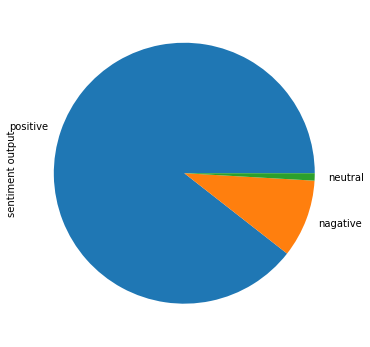

In [25]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6))

In [26]:
result_NLTK_2 = []
pos=0
neg=0
net=0
st_pos=0
st_neg=0
for num in df_s['compound']:
    if (num > 0.5):
        result_NLTK_2.append('strong_pos')
        st_pos+=1
    elif (num >0 ):
        result_NLTK_2.append('pos')
        pos+=1    
    elif (num < -0.5):
        result_NLTK_2.append('strong_neg')
        st_neg+=1
    elif (num < 0):
        result_NLTK_2.append('neg')
        neg+=1
    else:
        result_NLTK_2.append('net')
        net+=1
        
result_NLTK_2

['strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'neg',
 'strong_neg',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_neg',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_neg',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong

In [29]:
df['result_NLTK_2']=result_NLTK_2

In [30]:
df.result_NLTK_2.value_counts()

strong_pos    8409
strong_neg     619
pos            535
neg            346
net             91
Name: result_NLTK_2, dtype: int64

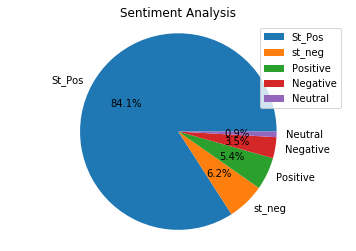

In [31]:
labels = 'St_Pos','st_neg','Positive','Negative', 'Neutral'
sizes = list(df.result_NLTK_2.value_counts())
#fig = plt.figure()  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')
plt.legend()
plt.show()

## Part3 Build Your Own Term Frequency

In [32]:
terms = ['wait','dish','delicious','recommend']

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [34]:
wait_cnt=[]
dish_cnt=[]
delicious_cnt=[]
reco_cnt=[]
for nrow in range(0,len(reviews)):
    
    text = df.text[nrow].lower()
    tokens = word_tokenize(text)
    wait_cnt.append(tokens.count('wait'))
    dish_cnt.append(tokens.count('dish'))
    delicious_cnt.append(tokens.count('delicious'))
    reco_cnt.append(tokens.count('recommend')+tokens.count('recommended'))

In [35]:
df['wait'] = wait_cnt
df['dish'] = dish_cnt
df['delicious'] = delicious_cnt
df['recommend'] = reco_cnt

In [36]:
df[['text','wait','dish','delicious','recommend']]

,text,wait,dish,delicious,recommend
0,My wife took me here on my birthday for breakf...,1,0,1,0
1,I have no idea why some people give bad review...,1,0,0,0
2,love the gyro plate. Rice is so good and I als...,0,0,0,0
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0,0,0,0
4,General Manager Scott Petello is a good egg!!!...,0,0,0,0
5,"Quiessence is, simply put, beautiful. Full wi...",0,0,1,0
6,Drop what you're doing and drive here. After I...,0,0,2,0
7,"Luckily, I didn't have to travel far to make m...",0,0,0,0
8,Definitely come for Happy hour! Prices are ama...,1,0,0,0
9,Nobuo shows his unique talents with everything...,0,0,0,0


In [37]:
df_first_100 = df[['wait','dish','delicious','recommend']][:100]

In [38]:
df_first_100.sum()

wait         13
dish          3
delicious    17
recommend    16
dtype: int64

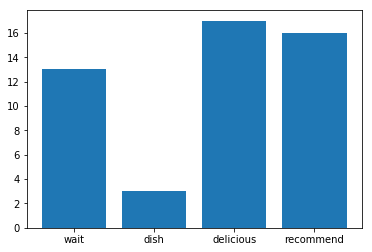

In [39]:
import numpy as np
import matplotlib.pyplot as plt
data = [('wait', df_first_100.sum()[0]), ('dish', df_first_100.sum()[1]), ('delicious', df_first_100.sum()[2]),('recommend',df_first_100.sum()[3])]
fruit, value = zip(*data)
x = np.arange(len(fruit))
fig, (ax1) = plt.subplots(1)
ax1.bar([0,1,2,3], value, align='center')
ax1.set(xticks=x,xticklabels=fruit)

#ax.tick_params(axis='y', direction='inout', length=10) #修改 ticks 的方向以及长度
plt.show()

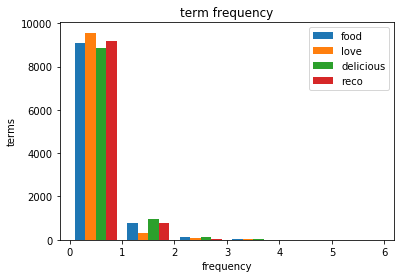

In [40]:
import numpy as np
import matplotlib.pyplot as plt
population_wait = df['wait']
population_dish = df['dish']
population_delicious=df['delicious']
population_reco = df['recommend']
bins = 6

plt.hist([population_wait,population_dish,population_delicious,population_reco], bins, label=['food', 'love','delicious','reco']
        )

plt.xlabel('frequency')
plt.ylabel('terms')
plt.title('term frequency')
plt.legend()

plt.show()

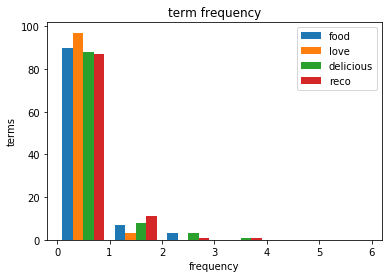

In [41]:
population_wait = df_first_100['wait']
population_dish = df_first_100['dish']
population_delicious=df_first_100['delicious']
population_reco = df_first_100['recommend']
bins = [0,1,2,3,4,5,6]

plt.hist([population_wait,population_dish,population_delicious,population_reco], bins, label=['food', 'love','delicious','reco']
        )

plt.xlabel('frequency')
plt.ylabel('terms')
plt.title('term frequency')
plt.legend()

plt.show()